# Further Cleaning & Exploratory Analysis
In between this notebook, and the first, I cleaned the data further in Excel since the dataset was small enough to begin with. The resulting dataset lists 56 separate alleged hate crimes, in Austin, TX, since 2017. Out of the total number of reported, alleged incidents, 32.14% were directed at the LGBT Community. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# Importing the cleaned dataset
df = pd.read_csv(r"C:\Users\Robert\OneDrive\Desktop\aus_final.csv")
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 9 columns):
date_of_incident                56 non-null object
number_of_victims_under_18      56 non-null int64
number_of_victims_over_18       56 non-null int64
number_of_offenders_under_18    56 non-null int64
number_of_offenders_over_18     56 non-null int64
race_of_offender(s)             56 non-null object
offense                         56 non-null object
offense_location                56 non-null object
motivation                      56 non-null object
dtypes: int64(4), object(5)
memory usage: 4.0+ KB


None

## Convert 'date_of_inciedent' to datetime64 and make it the index

In [4]:
df.date_of_incident = df.date_of_incident.astype('datetime64')
df = df.set_index('date_of_incident')

In [13]:
display(df.shape)
print('----------------------------------')
display(df.index)

(56, 8)

----------------------------------


DatetimeIndex(['2017-01-01', '2017-02-01', '2017-03-21', '2017-04-12',
               '2017-05-15', '2017-06-04', '2017-06-15', '2017-06-17',
               '2017-07-01', '2017-07-05', '2017-07-20', '2017-07-21',
               '2017-10-15', '2017-10-24', '2017-11-10', '2017-11-16',
               '2017-11-26', '2018-01-19', '2018-01-25', '2018-02-08',
               '2018-02-22', '2018-03-02', '2018-03-06', '2018-03-08',
               '2018-04-01', '2018-04-30', '2018-05-21', '2018-06-16',
               '2018-06-28', '2018-08-13', '2018-08-25', '2018-09-09',
               '2018-09-11', '2018-10-11', '2018-10-29', '2018-12-15',
               '2018-12-29', '2019-01-19', '2019-02-22', '2019-03-31',
               '2019-04-04', '2019-06-11', '2019-08-06', '2019-08-12',
               '2019-08-24', '2019-11-23', '2019-12-19', '2019-12-30',
               '2020-03-01', '2020-03-08', '2020-03-22', '2020-03-22',
               '2020-04-20', '2020-04-29', '2020-05-17', '2020-05-20'],
     

## Not much we can do with the 'victims' and 'offenders' columns just yet...
We have much more categorical data we can work with first. 

## Question 1. How are reported incidences in Austin distributed according to motivation? 

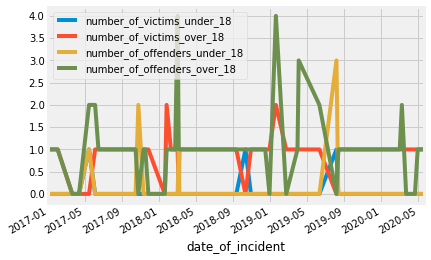

In [6]:
# Plotting the dataset (just for fun)
df.plot()
plt.show()

In [19]:
print('Total number of victims = 54')
display(df.number_of_victims_under_18.sum())
display(df.number_of_victims_over_18.sum())

Total number of victims = 54


3

51

Total number of reported hate crimes since 2017:


56

----------------------------------


Anti-LGBT                 18
Anti-African American      9
Anti-African American      9
Anti-Hispanic              7
Anti-Jewish                4
Anti-Muslim                4
Anti-Caucasian             3
Anti-Disability            1
Anti-Buddhist              1
Name: motivation, dtype: int64

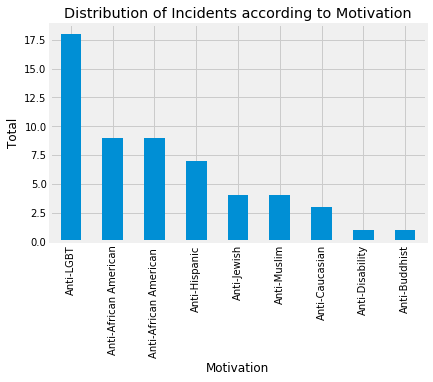

In [9]:
bias = df.motivation.value_counts()
print('Total number of reported hate crimes since 2017:')
display(bias.sum())
print('----------------------------------')
display(bias)

bias.plot.bar()
plt.xlabel('Motivation')
plt.ylabel('Total')
plt.title('Distribution of Incidents according to Motivation')
plt.show()

## Question 2. How are the offense-types distributed? 

Assault                21
Simple Assault          8
Intimidation            7
Criminal Mischief       5
Vandalism               4
Aggravated Assault      3
Destruction             2
Burglary/Assault        1
Assault by Contact      1
Theft                   1
Assault by Threat       1
Robbery                 1
Assault with Injury     1
Name: offense, dtype: int64

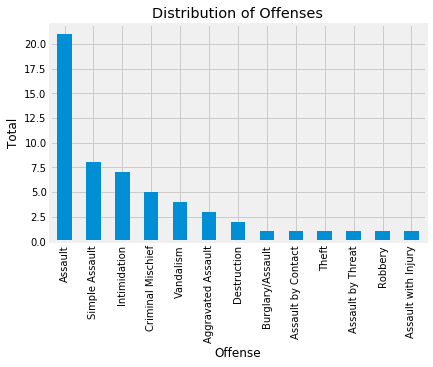

In [10]:
offense_count = df.offense.value_counts()
display(offense_count)
offense_count.plot.bar()
plt.xlabel('Offense')
plt.ylabel('Total')
plt.title('Distribution of Offenses')
plt.show()

## Question 3. How are the alleged offenders distributed according to race? 
    1. 43.75% of offenders were White
    2. 21.89% were Hispanic
    3. 7.81% were African American
    4. 1.56% were Asian (only 1 offender was recorded as Asian)

In [11]:
print('Total sum of offenders = 64')
display(df.number_of_offenders_under_18.sum())
display(df.number_of_offenders_over_18.sum())

Total sum of offenders = 64


7

57

White                      25
Hispanic                   12
Unknown                     8
African American            5
Group of Multiple Races     3
Asian                       1
White                       1
2 Hispanic, 2 White         1
Name: race_of_offender(s), dtype: int64

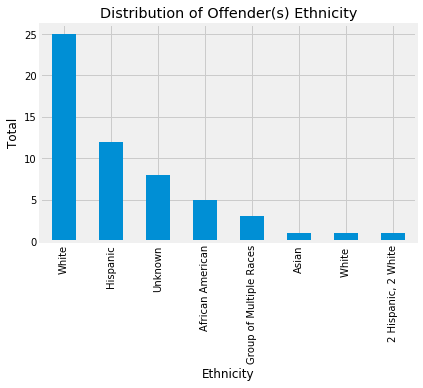

In [12]:
offenders_count = df['race_of_offender(s)'].value_counts()
display(offenders_count)
offenders_count.plot.bar()
plt.xlabel('Ethnicity')
plt.ylabel('Total')
plt.title('Distribution of Offender(s) Ethnicity')
plt.show()

Note...the above 'Offender' graph has an instance of 'Hispanic, White' as a single column because of an incident that occurred on 1/19/19 https://www.statesman.com/news/20200124/confrontation-that-ignited-attack-on-austin-gay-couple-questioned-by-detective -- 2 of the offenders were white, and the other 2 were hispanic. 